In [256]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_key import api_key
dataToLoad = "../data/productionCountriesWithoutNaNs.csv"
kagMovDF = pd.read_csv(dataToLoad)

In [257]:
kagMovDF

,Unnamed: 0.1,Production Country,Correct ID,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,...,Prime Video,Disney+,Type,TMDB ID,Vote Average,Vote Count,Genre,Movie Budget,Movie Revenue,Original Language
0,0,United States of America,398978,0,1,The Irishman,2019,18+,98/100,1,...,0,0,0,255839,7.637,5489.0,Crime,159000000.0,968853.0,en
1,1,United Kingdom,664280,1,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,...,0,0,0,664280,8.545,231.0,Documentary,0.0,0.0,en
2,2,United States of America,426426,2,5,Roma,2018,18+,94/100,1,...,0,0,0,11035,7.678,3431.0,Drama,15000000.0,1140769.0,es
3,3,United States of America,466282,3,6,To All the Boys I've Loved Before,2018,13+,94/100,1,...,0,0,0,466282,7.690,7636.0,Comedy,0.0,0.0,en
4,4,United States of America,656690,4,7,The Social Dilemma,2020,13+,93/100,1,...,0,0,0,656690,7.508,1249.0,Documentary,0.0,0.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2616,Germany,751545,2685,9485,Wild Portugal,2020,13+,37/100,0,...,0,1,0,751545,10.000,1.0,Documentary,0.0,0.0,en
2435,2617,United States of America,842007,2687,9489,Shark Attack Investigation: The Paige Winter S...,2020,13+,35/100,0,...,0,1,0,842007,0.000,0.0,Documentary,0.0,0.0,en
2436,2618,United States of America,781792,2688,9494,Big Sharks Rule,2018,7+,35/100,0,...,0,1,0,781792,0.000,0.0,Documentary,0.0,0.0,en
2437,2621,United States of America,776525,2691,9508,Texas Storm Squad,2020,13+,14/100,0,...,0,1,0,776525,0.000,0.0,Documentary,0.0,0.0,en


In [258]:
prodCountryCounts = kagMovDF["Production Country"].value_counts()
prodCountryCountsDF = pd.DataFrame(prodCountryCounts)
prodCountryCountsTen = []

#prodCountryCountTen = prodCountryCounts.groupby(prodCountryCounts["Production Country"] <= 10)
#prodCountryCountTen
prodCountryCountsDF.head(50)

for index, count in prodCountryCountsDF.iterrows():
    if count["Production Country"] <= 10:
        prodCountryCountsTen.append(count["Production Country"])
        
prodCountryCountsDF.drop(prodCountryCountsDF[prodCountryCountsDF['Production Country'] <= 10].index, inplace = True)
        
sumOfProdCountry = sum(prodCountryCountsTen)
simpleDF = [{"Production Country": sumOfProdCountry}]



prodCountryCountsDF = prodCountryCountsDF.append(simpleDF)
prodCountryCountsDF = prodCountryCountsDF.rename(index = {0:"Other"})
prodCountryCountsDF

C:\Users\joshu\AppData\Local\Temp\ipykernel_27760\3124928179.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCountryCountsDF = prodCountryCountsDF.append(simpleDF)


,Production Country
United States of America,1524
Canada,181
United Kingdom,177
India,90
France,55
Australia,49
Belgium,28
Germany,28
Philippines,27
Spain,26


In [259]:
prodCountryCountsDF["Production Country"]

United States of America    1524
Canada                       181
United Kingdom               177
India                         90
France                        55
Australia                     49
Belgium                       28
Germany                       28
Philippines                   27
Spain                         26
China                         25
Ireland                       15
Mexico                        14
Denmark                       12
South Africa                  12
Turkey                        11
Other                        165
Name: Production Country, dtype: int64

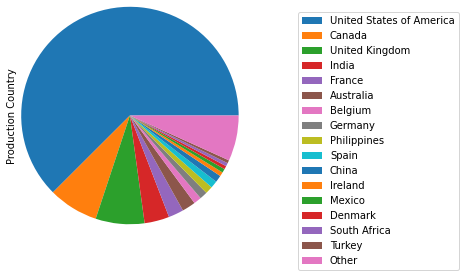

<Figure size 432x288 with 0 Axes>

In [260]:

prodCountryCountsDF.plot(kind="pie", y="Production Country", legend = True, labels = None, radius = 1.25)
plt.legend(labels = prodCountryCountsDF.index, loc = "upper left", bbox_to_anchor = (1.25, 1))
plt.show()
plt.savefig('piewithUS.png')

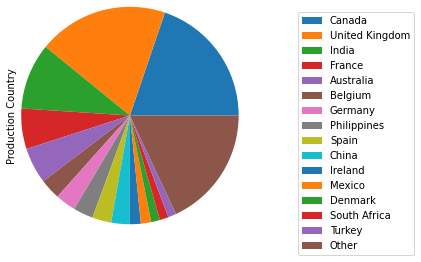

<Figure size 432x288 with 0 Axes>

In [261]:
prodCountryCountsDF.drop(prodCountryCountsDF[prodCountryCountsDF['Production Country'] >= 1500].index, inplace = True)
prodCountryCountsDF.plot(kind="pie", y="Production Country", legend = True, labels = None, radius = 1.25)
plt.legend(labels = prodCountryCountsDF.index, loc = "upper left", bbox_to_anchor = (1.25, 1))
plt.show()
plt.savefig('piewithoutUS.png')

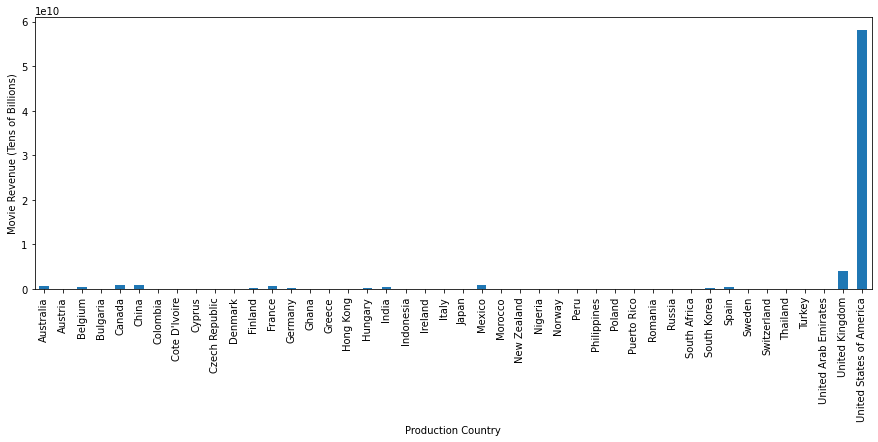

In [262]:
prodCountryRevs = kagMovDF.groupby(['Production Country']).agg(['sum'])[['Movie Revenue']]

#gg(['count'])[['Movie Revenue']]
#oteStats = movieData.groupby(['Year']).agg(['count', 'mean'])[['Vote Average', 'Vote Count']]
#prodCountryRevs.plot.pie(y=[0], figsize=(5, 5))
#for index, count in prodCountryRevs.iterrows():
#    if count["Production Country"] <= 1:
#        noRevs.append(count["Production Country"])
        
prodCountryRevs.drop(prodCountryRevs[prodCountryRevs["Movie Revenue"]["sum"] == 0].index, inplace = True)
#print(prodCountryRevs['sum'])

#pCountryRevs = prodCountryRevs.to_frame(name=['Movie Revenue', 'sum'])
#pCountryRevs

#prodCountryRevs.plot.bar(x = index, y="Movie Revenue", legend = True)
#plt.legend(labels = prodCountryRevs.index, loc = "upper left", bbox_to_anchor = (1.25, 1))
#plt.show()

prodCountryRevs1 = prodCountryRevs["Movie Revenue"]["sum"]

plot_pandas = prodCountryRevs1.plot.bar(figsize=(15,5))
plt.xlabel('Production Country')
plt.ylabel('Movie Revenue (Tens of Billions)')

#plt.show()
plt.savefig('barwithUS.png')


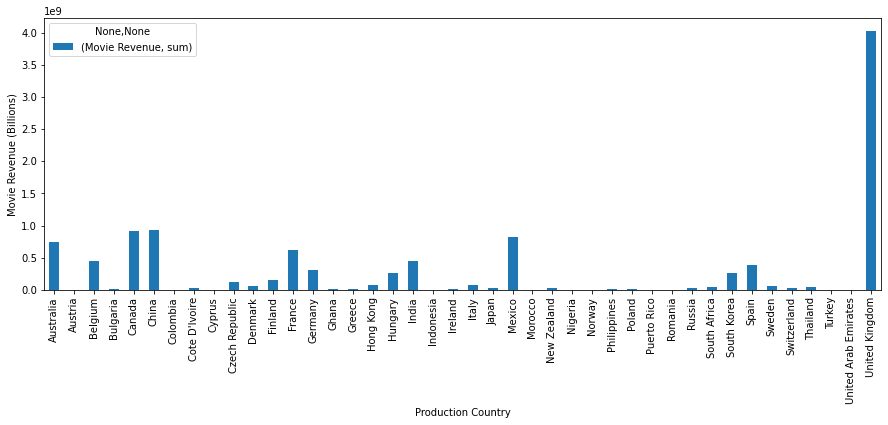

In [263]:
#prodCountryRevs1d = prodCountryRevs.drop(prodCountryRevs[prodCountryRevs["Movie Revenue"]["sum"] > 500000000].index, inplace = True)
prodCountryRevs1d = prodCountryRevs.loc[prodCountryRevs["Movie Revenue"]["sum"] <= 5000000000 ]
prodCountryRevs1d = prodCountryRevs1d.loc[prodCountryRevs1d["Movie Revenue"]["sum"] >= 11 ]
prodCountryRevs1d = pd.DataFrame(prodCountryRevs1d)
prodCountryRevs1d.head(50)
plot_pandas = prodCountryRevs1d.plot.bar(figsize=(15,5))
plt.xlabel('Production Country')
plt.ylabel('Movie Revenue (Billions)')
plt.savefig('barwithoutUS.png')


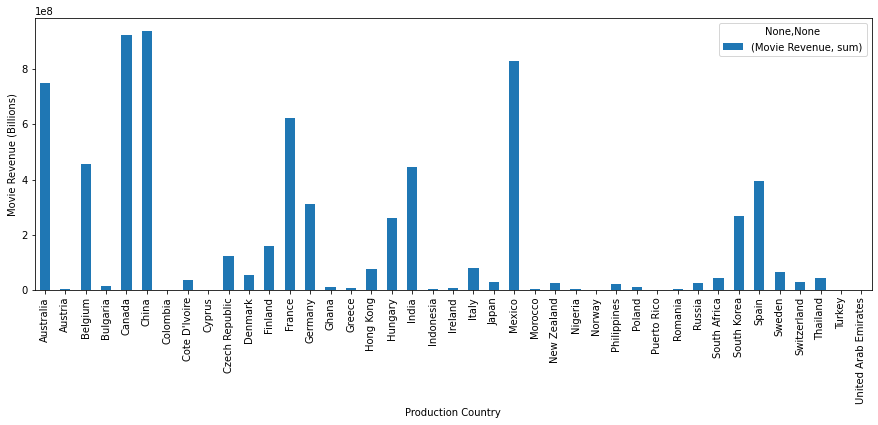

In [264]:
prodCountryRevs2d = prodCountryRevs1d.loc[prodCountryRevs1d["Movie Revenue"]["sum"] <= 3000000000 ]
prodCountryRevs2d = prodCountryRevs2d.loc[prodCountryRevs2d["Movie Revenue"]["sum"] >= 11 ]
prodCountryRevs2d = pd.DataFrame(prodCountryRevs2d)
prodCountryRevs2d.head(50)
plot_pandas = prodCountryRevs2d.plot.bar(figsize=(15,5))
plt.xlabel('Production Country')
plt.ylabel('Movie Revenue (Billions)')
plt.savefig('barwithoutUKUS.png')